In [1]:
# Dependencies
import random
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import locale
from locale import atof

In [41]:
master_stats_df = pd.read_csv("Resources/Jan_2018.csv")
master_stats_df.fillna(value=0 , inplace=True)

unique_carrier_list = master_stats_df["UniqueCarrier"].unique()

Delay_df = master_stats_df[master_stats_df.DepDelayMinutes > 0]
beforetime_df = master_stats_df[master_stats_df.ArrDelay < 0]
cancelled_flights_df = master_stats_df[master_stats_df.Cancelled > 0]
diverted_flights_df = master_stats_df[master_stats_df.Diverted > 0]
#print(unique_carrier_list)
#Delay_df.count()



In [3]:
carrier_group_df = master_stats_df.groupby("UniqueCarrier")

carrier_delay_group_df = Delay_df.groupby("UniqueCarrier")
#print(airline_group_df.count())
carrier_total_delay_df = carrier_delay_group_df["DepDelayMinutes"].sum()

#carrier_total_delay_df

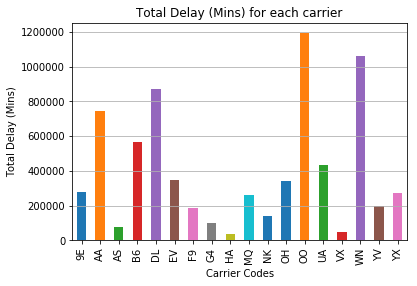

In [4]:
# Create a bar chart based off of the group series from before
count_chart = carrier_total_delay_df.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Carrier Codes")
count_chart.set_ylabel("Total Delay (Mins)")

plt.title("Total Delay (Mins) for each carrier")
plt.grid(axis='y')
plt.show()
plt.tight_layout()


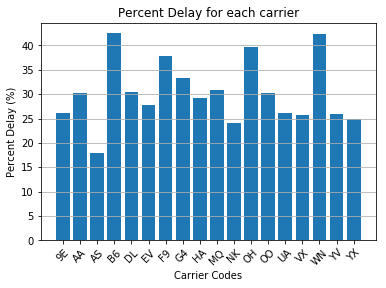

In [9]:
carrier_delay_per  = []

carrier_delay_per = [carrier_delay_group_df.get_group(carrier).size/carrier_group_df.get_group(carrier).size* 100 for carrier in unique_carrier_list]

# print(unique_carrier_list)
# print(carrier_delay_per)

plt.bar(unique_carrier_list,carrier_delay_per)
plt.xlabel("Carrier Codes")
plt.ylabel("Percent Delay (%)")
plt.xticks(rotation = 45)

plt.title("Percent Delay for each carrier")
plt.grid(axis='y')
plt.show()
plt.tight_layout()
plt.show()

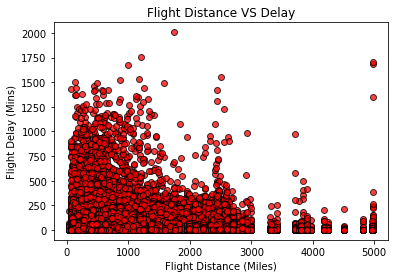

In [8]:
plt.scatter(master_stats_df["Distance"], master_stats_df["DepDelayMinutes"],marker="o", facecolors="red", edgecolors="black",alpha=0.75)
plt.title("Flight Distance VS Delay")
plt.xlabel("Flight Distance (Miles)")
plt.ylabel("Flight Delay (Mins)")
plt.show()

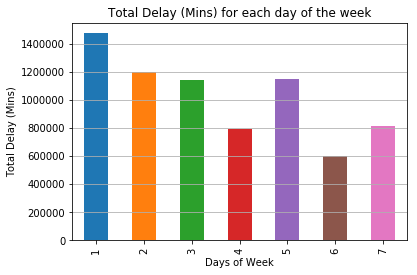

In [11]:
weekdays_df = Delay_df.groupby("DayOfWeek")["DepDelayMinutes"].sum()

# Create a bar chart based off of the group series from before
count_chart = weekdays_df.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Days of Week")
count_chart.set_ylabel("Total Delay (Mins)")

plt.title("Total Delay (Mins) for each day of the week")
plt.grid(axis='y')
plt.show()
plt.tight_layout()

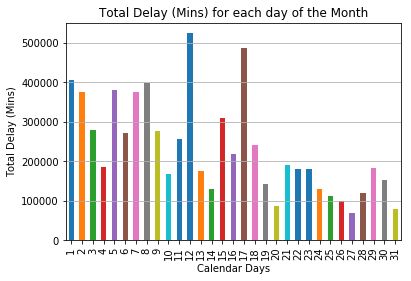

In [12]:
calendar_df = Delay_df.groupby("DayofMonth")["DepDelayMinutes"].sum()

# Create a bar chart based off of the group series from before
count_chart = calendar_df.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Calendar Days")
count_chart.set_ylabel("Total Delay (Mins)")

plt.title("Total Delay (Mins) for each day of the Month")
plt.grid(axis='y')
plt.show()
plt.tight_layout()

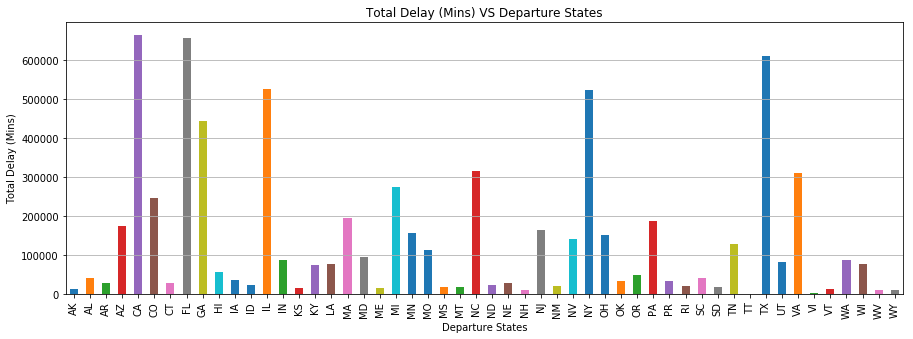

In [22]:

dep_city_df = Delay_df.groupby("OriginState")["DepDelayMinutes"].sum()

# Create a bar chart based off of the group series from before
count_chart = dep_city_df.plot(kind='bar', figsize= (15,5))

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Departure States")
count_chart.set_ylabel("Total Delay (Mins)")

plt.title("Total Delay (Mins) VS Departure States")
plt.grid(axis='y')
plt.show()
plt.tight_layout()


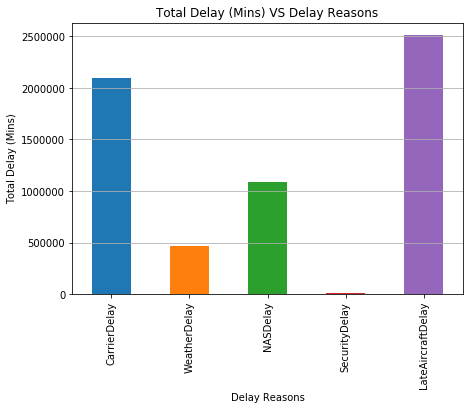

In [34]:
delay_reasons_df = Delay_df[["CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay"]]
delay_reasons_df.sum()

count_chart = delay_reasons_df.sum().plot(kind='bar', figsize= (7,5))

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Delay Reasons")
count_chart.set_ylabel("Total Delay (Mins)")

plt.title("Total Delay (Mins) VS Delay Reasons")
plt.grid(axis='y')
plt.show()
plt.tight_layout()

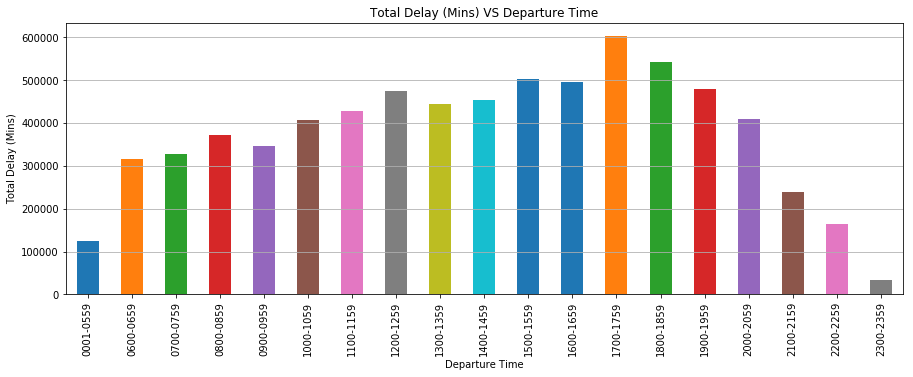

In [35]:
dep_timeblk_df = Delay_df.groupby("DepTimeBlk")["DepDelayMinutes"].sum()

# Create a bar chart based off of the group series from before
count_chart = dep_timeblk_df.plot(kind='bar', figsize= (15,5))

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Departure Time")
count_chart.set_ylabel("Total Delay (Mins)")

plt.title("Total Delay (Mins) VS Departure Time")
plt.grid(axis='y')
plt.show()
plt.tight_layout()

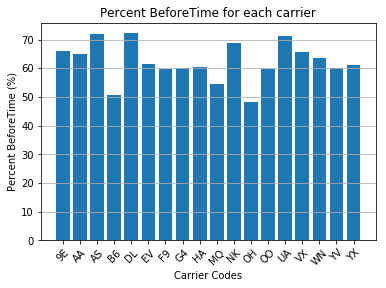

In [37]:
carrier_beforetime_group_df = beforetime_df.groupby("UniqueCarrier")
#print(airline_group_df.count())
carrier_total_beforetime_df = carrier_beforetime_group_df["ArrDelay"].sum()

carrier_bt_per  = []

carrier_bt_per = [carrier_beforetime_group_df.get_group(carrier).size/carrier_group_df.get_group(carrier).size* 100 for carrier in unique_carrier_list]

# print(unique_carrier_list)
# print(carrier_delay_per)

plt.bar(unique_carrier_list,carrier_bt_per)
plt.xlabel("Carrier Codes")
plt.ylabel("Percent BeforeTime (%)")
plt.xticks(rotation = 45)

plt.title("Percent BeforeTime for each carrier")
plt.grid(axis='y')
plt.show()
plt.tight_layout()
plt.show()

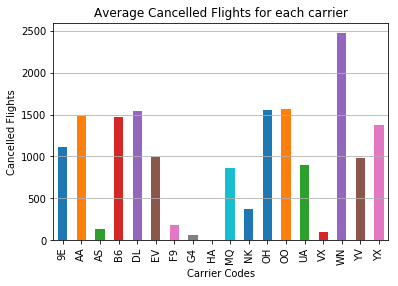

In [40]:
carrier_cancelled_group_df = cancelled_flights_df.groupby("UniqueCarrier")
#print(airline_group_df.count())
carrier_total_cancelled_df = carrier_cancelled_group_df["Cancelled"].sum()

count_chart = carrier_total_cancelled_df.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Carrier Codes")
count_chart.set_ylabel("Cancelled Flights")

plt.title("Average Cancelled Flights for each carrier")
plt.grid(axis='y')
plt.show()
plt.tight_layout()

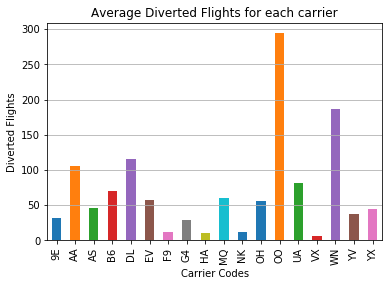

In [42]:
carrier_diverted_group_df = diverted_flights_df.groupby("UniqueCarrier")
#print(airline_group_df.count())
carrier_total_diverted_df = carrier_diverted_group_df["Diverted"].sum()

count_chart = carrier_total_diverted_df.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Carrier Codes")
count_chart.set_ylabel("Diverted Flights")

plt.title("Average Diverted Flights for each carrier")
plt.grid(axis='y')
plt.show()
plt.tight_layout()